In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results = {}
data_name = 'Norman'

### GEARS

In [3]:
p_vals = np.load('p_values_norman_filter_0.01_gears.npy',allow_pickle=True).item()
jaccards = np.load('jaccards_norman_filter_0.01_gears.npy',allow_pickle=True).item()

In [4]:
def get_jaccards(split_key):
    jaccards_list = []

    for k in jaccards.keys():
        jaccards_list.append(np.mean(jaccards[k][split_key]))
        
    return jaccards_list

results['GEARS'] = {}

results['GEARS']['2/2 Seen'] = get_jaccards('combo_seen2')
print('combo_seen2')
print(results['GEARS']['2/2 Seen'])

results['GEARS']['1/2 Seen'] = get_jaccards('combo_seen1')
print('combo_seen1')
print(results['GEARS']['1/2 Seen'])

results['GEARS']['0/2 Seen'] = get_jaccards('combo_seen0')
print('combo_seen0')
print(results['GEARS']['0/2 Seen'])

combo_seen2
[0.202823495272181, 0.1822980839832596, 0.23754649106163644, 0.1643717276770979, 0.2084855778608513]
combo_seen1
[0.19716324638105612, 0.1820827122126891, 0.16632544568459223, 0.16329498274402438, 0.174281921860531]
combo_seen0
[0.20152161692340584, 0.1739900962568914, 0.14666980299866383, 0.16228680487918828, 0.2418153442479989]


### CPA

In [5]:
p_vals = np.load('p_values_norman_filter_0.01_cpa.npy',allow_pickle=True).item()
jaccards = np.load('jaccards_norman_filter_0.01_cpa.npy',allow_pickle=True).item()

In [6]:
def get_jaccards(split_key):
    jaccards_list = []

    for k in jaccards.keys():
        jaccards_list.append(np.mean(jaccards[k][split_key]))
        
    return jaccards_list

results['CPA'] = {}

results['CPA']['2/2 Seen'] = get_jaccards('combo_seen2')
print('combo_seen2')
print(results['CPA']['2/2 Seen'])

results['CPA']['1/2 Seen'] = get_jaccards('combo_seen1')
print('combo_seen1')
print(results['CPA']['1/2 Seen'])

results['CPA']['0/2 Seen'] = get_jaccards('combo_seen0')
print('combo_seen0')
print(results['CPA']['0/2 Seen'])

combo_seen2
[0.15236867119452074, 0.11835455058101209, 0.15936436587228406, 0.14600950428364412, 0.16502711882703724]
combo_seen1
[0.12156693954458603, 0.12178552647001825, 0.10649631522189569, 0.11488618208962419, 0.10454182557726698]
combo_seen0
[0.10459344415498495, 0.0946376825655875, 0.06233859397417504, 0.10048973022372328, 0.09447621073707461]


### Linear

In [7]:
p_vals = np.load('p_values_norman_filter_0.01_linear.npy',allow_pickle=True).item()
jaccards = np.load('jaccards_norman_filter_0.01_linear.npy',allow_pickle=True).item()

In [8]:
def get_jaccards(split_key):
    jaccards_list = []

    for k in jaccards.keys():
        jaccards_list.append(np.mean(jaccards[k][split_key]))
        
    return jaccards_list

results['GRN'] = {}

results['GRN']['2/2 Seen'] = get_jaccards('combo_seen2')
print('combo_seen2')
print(results['GRN']['2/2 Seen'])

results['GRN']['1/2 Seen'] = get_jaccards('combo_seen1')
print('combo_seen1')
print(results['GRN']['1/2 Seen'])

results['GRN']['0/2 Seen'] = get_jaccards('combo_seen0')
print('combo_seen0')
print(results['GRN']['0/2 Seen'])

combo_seen2
[0.05489620630066459, 0.044444975500499216, 0.0443207451081641, 0.03579582038573881, 0.042236182401833994]
combo_seen1
[0.04157088196381354, 0.0448043594874929, 0.045511031154306505, 0.04854446874148899, 0.035610778360796694]
combo_seen0
[0.030324689234821185, 0.0453362534267244, 0.012809450997524393, 0.06453442279580623, 0.028990173261021063]


In [9]:
## % Improvement

print((np.mean(results['GEARS']['0/2 Seen']) - np.mean(results['CPA']['0/2 Seen']))/(np.mean(results['CPA']['0/2 Seen']))*100)

print((np.mean(results['GEARS']['1/2 Seen']) - np.mean(results['CPA']['1/2 Seen']))/(np.mean(results['CPA']['1/2 Seen']))*100)

print((np.mean(results['GEARS']['2/2 Seen']) - np.mean(results['CPA']['2/2 Seen']))/(np.mean(results['CPA']['2/2 Seen']))*100)


102.89404379652302
55.13513392740263
34.32638704869228


In [10]:
df1 = pd.DataFrame(results['GEARS'])
df1 = df1.melt()
df1['Model'] = 'GEARS'

df2 = pd.DataFrame(results['CPA'])
df2 = df2.melt()
df2['Model'] = 'CPA'

df3 = pd.DataFrame(results['GRN'])
df3 = df3.melt()
df3['Model'] = 'GRN'

In [11]:
plot_df = pd.concat([df1, df2, df3], ignore_index=True)
plot_df = plot_df.rename(columns={'value':'Jaccard similarity', 'variable':'category'})

In [12]:
color_pal = {
'GRN': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
'CPA': (0.4, 0.7607843137254902, 0.6470588235294118),
'GEARS': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
'No-Perturb': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)}
pal_order = [color_pal[i] for i in pd.DataFrame(plot_df).Model.unique()]

/dfs/user/yhr/deepamp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


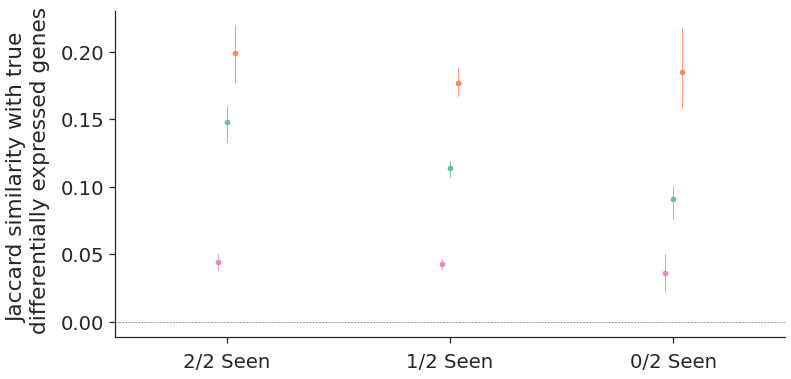

In [16]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.8)

g = sns.pointplot('category', 'Jaccard similarity', 
    data=plot_df, 
    order = ['2/2 Seen', '1/2 Seen', '0/2 Seen'], 
    hue = 'Model',
    palette= [color_pal['GRN'], color_pal['CPA'], color_pal['GEARS']],         
    dodge=True, 
    join=False,
    hue_order = ['GRN', 'CPA', 'GEARS'],
    s=10,
    errwidth=0.8)
sns.despine()
g.legend_.remove()
g.set(xlabel=None, )
g.axhline(0, linewidth=0.6, linestyle="dashed")

for i in range(3):
    g.collections[i].set_sizes([13])

plt.ylabel("Jaccard similarity with true \n differentially expressed genes",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
#g.spines['left'].set_linewidth(0.8)
#g.spines['bottom'].set_linewidth(0.8)



# Save the figure
plt.savefig('fig2h.svg', bbox_inches='tight')

#plt.savefig('subgroup_' + data_name + '_jaccard.pdf', bbox_inches='tight')